In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('df_24.csv')
y=pd.read_csv('y.csv')
df.columns

Index(['Age', 'DailyRate', 'Department', 'JobInvolvement', 'JobLevel',
       'MaritalStatus', 'MonthlyIncome', 'OverTime', 'NumCompaniesWorked',
       'JobRole_Healthcare Representative', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Sales Representative',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Satisfaction', 'Salary', 'YearsAt'],
      dtype='object')

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.25,random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [5]:
X_train.shape

(1102, 24)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [18]:
classifier=Sequential()

classifier.add(Dense(units=24,activation='relu'))

classifier.add(Dense(units=17,activation='relu'))

classifier.add(Dense(units=10,activation='relu'))

classifier.add(Dense(units=5,activation='relu'))

classifier.add(Dense(units=3,activation='relu'))

classifier.add(Dense(units=1,activation='sigmoid'))

In [19]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [21]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
74/74 [==============================] - 1s 4ms/step - loss: 0.5613 - accuracy: 0.8306 - val_loss: 0.4703 - val_accuracy: 0.8242
Epoch 2/100
74/74 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.8306 - val_loss: 0.4235 - val_accuracy: 0.8242
Epoch 3/100
74/74 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8306 - val_loss: 0.3915 - val_accuracy: 0.8242
Epoch 4/100
74/74 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.8306 - val_loss: 0.3733 - val_accuracy: 0.8242
Epoch 5/100
74/74 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8306 - val_loss: 0.3663 - val_accuracy: 0.8242
Epoch 6/100
74/74 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8306 - val_loss: 0.3646 - val_accuracy: 0.8242
Epoch 7/100
74/74 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.8306 - val_loss: 0.3669 - val_accuracy: 0.8242
Epoch 8/100
7

In [22]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

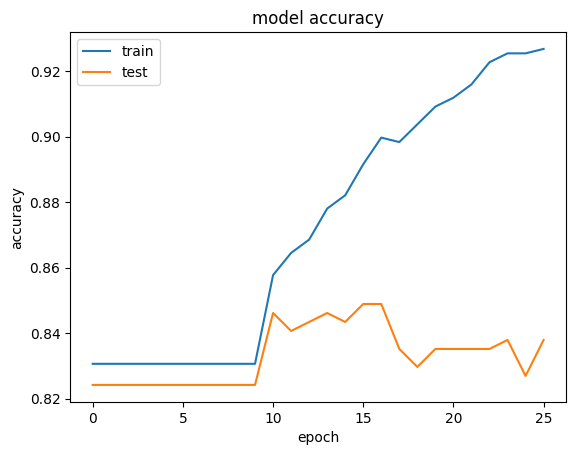

In [23]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

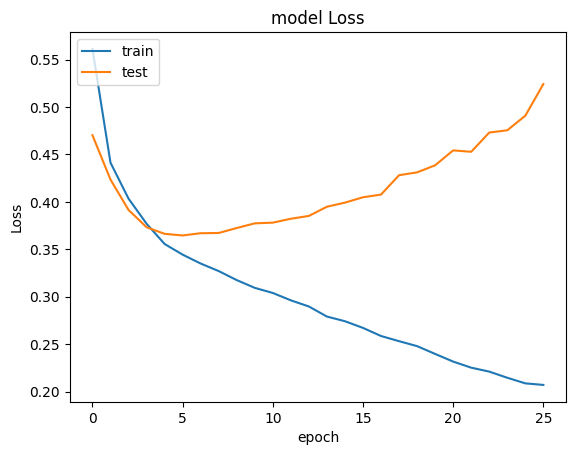

In [24]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [25]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

12/12 [==============================] - 0s 1ms/step


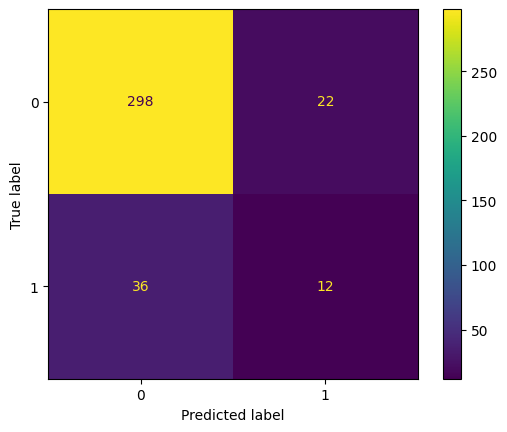

In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [27]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test,y_pred)
accuracy_score(y_test,y_pred)*100,auc_roc

(84.23913043478261, 0.590625)

In [28]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test,y_pred)
auc_roc

0.590625